In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!conda install -c conda-forge folium

import os
import folium # map rendering library
# Matplotlib and associated plotting modules

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mp
import re
import csv
%matplotlib inline


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    branca:          0.4.1-py_0        conda-forge
    folium:          

In [4]:
List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text
soup = BeautifulSoup(source, 'xml')
table = soup.find('table')

column_names=['Postalcode','Borough','Neighbourhood']
df = pd.DataFrame(columns=column_names)

In [5]:
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data

In [6]:
df.head()

,Postalcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [7]:
indexNum = df[df['Borough'] == 'Not assigned'].index
df.drop(indexNum, inplace = True)
df_group = df.groupby(['Postalcode', 'Borough'], sort = False).agg( ','.join)
df_new = df_group.reset_index()
df_new.head()

,Postalcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [8]:
def get_geocode(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

In [9]:
toronto_geo_df=pd.read_csv('http://cocl.us/Geospatial_data')

In [10]:
toronto_geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
toronto_geo_df.columns = ['Postalcode','Latitude','Longitude']
toronto_geo_df.head()

,Postalcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
geo_merged = pd.merge(toronto_geo_df, df_new, on='Postalcode')
toronto_geo_data=geo_merged[['Postalcode','Borough','Neighbourhood','Latitude','Longitude']]
toronto_geo_data.head()

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [13]:
toronto_geo_data.shape

(103, 5)

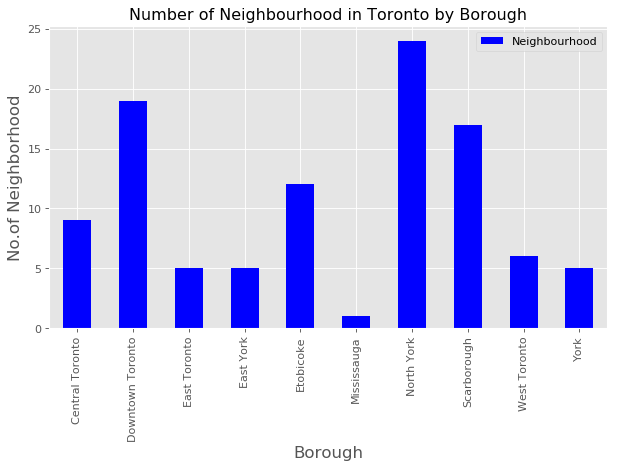

In [14]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 80)
# title
plt.title('Number of Neighbourhood in Toronto by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15 )
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
toronto_geo_data.groupby('Borough')['Neighbourhood'].count().plot(kind='bar',color='blue')
#legend
plt.legend()
plt.show()

In [15]:
CLIENT_ID = 'DPLMZQJDUE1GEG2KKCHAWDCAHDYYZMN2ST1XSXAM3JI0KEHB' # your Foursquare ID
CLIENT_SECRET = 'B0NUML5O2A3C114ASAN0Q5BIZXINIHQICJJHZG4URITULDBH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails captured')


Your credentails captured


In [16]:
# defining radius and limit of venues to get
radius=1000
LIMIT=100

In [49]:
def get_venues(lat,lng):
    radius=1000
    LIMIT=100
    #set variables
    CLIENT_ID = 'DPLMZQJDUE1GEG2KKCHAWDCAHDYYZMN2ST1XSXAM3JI0KEHB'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='B0NUML5O2A3C114ASAN0Q5BIZXINIHQICJJHZG4URITULDBH' # Foursquare Secret, note there is a daily call quota it
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_lat=row['venue']['location']['lat']
            venue_lng=row['venue']['location']['lng']
            venue_details.append([venue_id,venue_name,venue_category,venue_lat,venue_lng])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category','venue_lat','venue_lng']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [53]:
#toronto_geo_data.drop("Postalcode",axis = 1,inplace=True)
toronto_geo_data.head()

,Borough,Neighbourhood,Latitude,Longitude
0,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,Scarborough,Woburn,43.770992,-79.216917
4,Scarborough,Cedarbrae,43.773136,-79.239476


In [54]:
# prepare neighborhood list that contains indian restaurant
column_names=['Borough', 'Neighborhood', 'ID','Name','Venue_Lat','Venue_Lng']
indian_rest_tr=pd.DataFrame(columns=column_names)
count=1
for row in toronto_geo_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(toronto_geo_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category,venue_lat,venue_lng=resturant_detail
        indian_rest_tr = indian_rest_tr.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name ,
                                                'Venue_Lat' : venue_lat , 
                                                'Venue_Lng' : venue_lng
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) Indian Resturants in Malvern, Rouge, Scarborough:0
( 2 / 103 ) Indian Resturants in Rouge Hill, Port Union, Highland Creek, Scarborough:0
( 3 / 103 ) Indian Resturants in Guildwood, Morningside, West Hill, Scarborough:0
( 4 / 103 ) Indian Resturants in Woburn, Scarborough:1
( 5 / 103 ) Indian Resturants in Cedarbrae, Scarborough:2
( 6 / 103 ) Indian Resturants in Scarborough Village, Scarborough:0
( 7 / 103 ) Indian Resturants in Kennedy Park, Ionview, East Birchmount Park, Scarborough:0
( 8 / 103 ) Indian Resturants in Golden Mile, Clairlea, Oakridge, Scarborough:0
( 9 / 103 ) Indian Resturants in Cliffside, Cliffcrest, Scarborough Village West, Scarborough:0
( 10 / 103 ) Indian Resturants in Birch Cliff, Cliffside West, Scarborough:0
( 11 / 103 ) Indian Resturants in Dorset Park, Wexford Heights, Scarborough Town Centre, Scarborough:2
( 12 / 103 ) Indian Resturants in Wexford, Maryvale, Scarborough:1
( 13 / 103 ) Indian Resturants in Agincourt, Scarborough:1
( 14 / 103 ) 

In [55]:
indian_rest_tr.head()

,Borough,Neighborhood,ID,Name,Venue_Lat,Venue_Lng
0,Scarborough,Woburn,4c632edeedd320a19ad5ae29,Bombay Palace,43.767057,-79.227682
1,Scarborough,Cedarbrae,4d6008f829ef236a8832a059,CANBE Foods Inc,43.773546,-79.246082
2,Scarborough,Cedarbrae,4c77fc87bd346dcb8c90f0ef,La Sani Grill,43.776214,-79.234848
3,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",5226562611d2cd49d83ef03b,Kairali,43.754915,-79.276945
4,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant,43.756042,-79.276276


In [56]:
indian_rest_tr.shape

(46, 6)

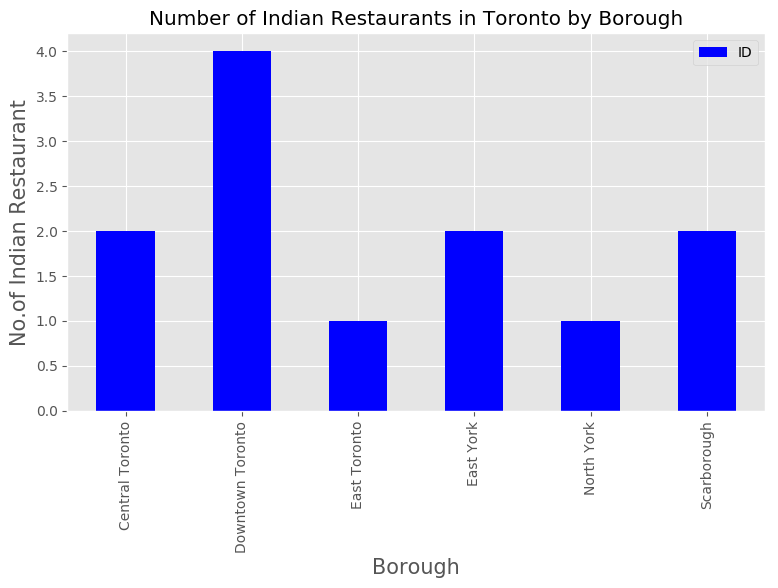

In [26]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Restaurants in Toronto by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Restaurant', fontsize=15)
#giving a bar plot
indian_rest_tr.groupby('Borough')['ID'].count().plot(kind='bar',color='blue')
#legend
plt.legend()
#displays the plot
plt.show()

In [57]:
#indian_rest_tr.groupby('Neighborhood').count()

indian_rest_tr.groupby('Borough')['ID'].count()

Borough
Central Toronto      5
Downtown Toronto     8
East Toronto        10
East York            5
Etobicoke            2
Mississauga          2
North York           2
Scarborough          7
West Toronto         4
York                 1
Name: ID, dtype: int64

In [58]:
indian_rest_tr.groupby('Neighborhood')['ID'].count()

Neighborhood
Agincourt                                                1
Bedford Park, Lawrence Manor East                        1
Brockton, Parkdale Village, Exhibition Place             2
Canada Post Gateway Processing Centre                    2
Cedarbrae                                                2
Christie                                                 2
Church and Wellesley                                     1
Davisville                                               3
Dorset Park, Wexford Heights, Scarborough Town Centre    2
East Toronto, Broadview North (Old East York)            1
Harbourfront East, Union Station, Toronto Islands        1
High Park, The Junction South                            1
India Bazaar, The Beaches West                           7
Leaside                                                  1
New Toronto, Mimico South, Humber Bay Shores             1
Queen's Park, Ontario Provincial Government              1
Regent Park, Harbourfront                  

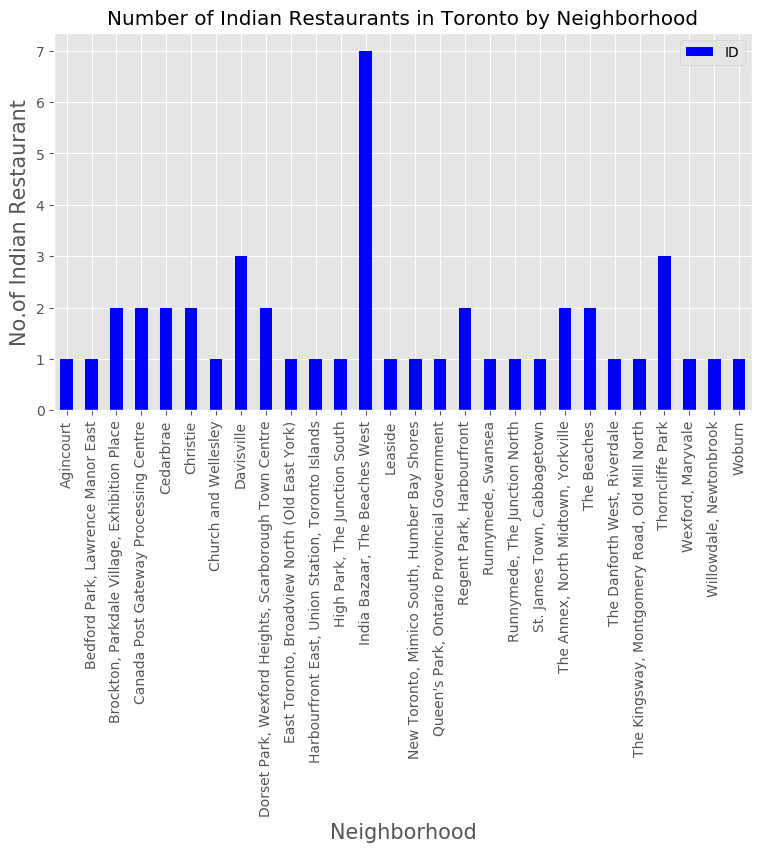

In [60]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Restaurants in Toronto by Neighborhood')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Restaurant', fontsize=15)
#giving a bar plot
indian_rest_tr.groupby('Neighborhood')['ID'].count().plot(kind='bar',color='blue')
#legend
plt.legend()
#displays the plot
plt.show()

In [63]:
indian_rest_tr.head()

,Borough,Neighborhood,ID,Name,Venue_Lat,Venue_Lng
0,Scarborough,Woburn,4c632edeedd320a19ad5ae29,Bombay Palace,43.767057,-79.227682
1,Scarborough,Cedarbrae,4d6008f829ef236a8832a059,CANBE Foods Inc,43.773546,-79.246082
2,Scarborough,Cedarbrae,4c77fc87bd346dcb8c90f0ef,La Sani Grill,43.776214,-79.234848
3,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",5226562611d2cd49d83ef03b,Kairali,43.754915,-79.276945
4,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant,43.756042,-79.276276


In [64]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [83]:
locations = indian_rest_tr[['Venue_Lat', 'Venue_Lng']]
locationlist = locations.values.tolist()
len(locationlist)

46

In [86]:
map = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=indian_rest_tr['Neighborhood'][point]).add_to(map)
map